# nerd_sniping

We perform a finite difference solution to the infinite resistor grid problem shown in XKCD comic 356.

In [1]:
from functions import nerd_snipe
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16

# The simulated and analytic values of resistance

Rsim = 0.7453 Ohms
Ran = 0.7732 Ohms


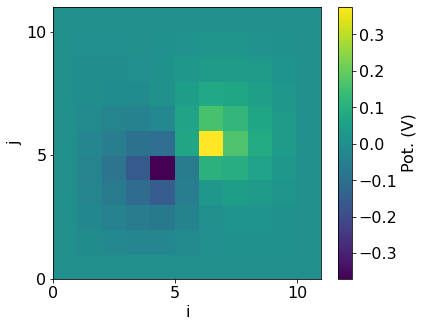

In [22]:
# the grid size
nx,ny = 11,11

# the locations of the source and sink
bx,by = nx//2-1,ny//2-1
cx,cy = nx//2+1,ny//2

# works out the resulting potential
V = nerd_snipe(nx,ny,bx,by,cx,cy)

# the resistance from the calculated potential
Rsim = V[cx,cy]-V[bx,by]
print('Rsim = {:0.4f} Ohms'.format(Rsim))

# the analytic resistance
Ran = 4/np.pi - 0.5
print('Ran = {:0.4f} Ohms'.format(Ran))


# plot the potential
fig,ax = plt.subplots(1,1,figsize=[6,5])
plot = ax.pcolor(V.T)
cbar = fig.colorbar(plot)
cbar.set_label('Pot. (V)')

ax.set_xticks([0,5,10])
ax.set_yticks([0,5,10])
ax.set_xlabel('i');
ax.set_ylabel('j');



# Convergence to the analytic value

In [3]:
# the grid sizes
sizes =  [[11,11],[21,21],[41,41],[81,81],[161,161],[321,321]]
resistances = []

for size in sizes:
    nx,ny = size
    bx,by = nx//2-1,ny//2
    cx,cy = nx//2+1,ny//2+1
    V = nerd_snipe(nx,ny,bx,by,cx,cy)
    Rsim = V[cx,cy]-V[bx,by]
    resistances.append(Rsim)

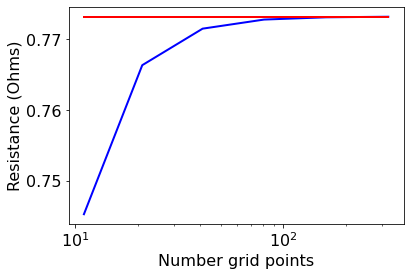

In [4]:
fig,ax = plt.subplots(1,1,figsize=[6,4])
x_vals = [size[0] for size in sizes]
ax.semilogx(x_vals,resistances,linewidth=2,color='b')
ax.set_ylabel('Resistance (Ohms)')
ax.set_xlabel('Number grid points')
ax.semilogx([11,321],[Ran,Ran],linewidth=2,color='r')

Text(0.5, 0, 'Number grid points')

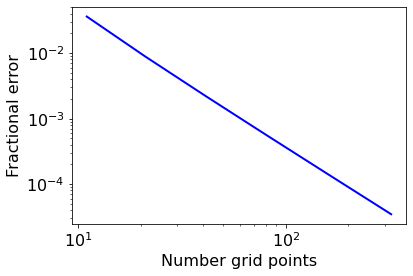

In [5]:
fig,ax = plt.subplots(1,1,figsize=[6,4])
resistance_delta = [(Ran - resistance)/Ran for resistance in resistances]
ax.loglog(x_vals,resistance_delta,linewidth=2,color='b')
ax.set_ylabel('Fractional error')
ax.set_xlabel('Number grid points')